# MODIS vs VIIRS Fire Progression

In [1]:
#!wget https://firms.modaps.eosdis.nasa.gov/data/country/modis/2015/modis_2015_United_States.csv

In [2]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo import ogr
import numpy as np
from osgeo import osr
from pathlib import Path
import warnings
#from matplotlib_scalebar.scalebar import ScaleBar
warnings.filterwarnings('ignore')

In [3]:
tundra_shapefile = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Geometries/Alaskan_Tundra/Alaska_tundra_merged.shp'
tundra_shape = gpd.read_file(tundra_shapefile)
tundra_shape

,AREA,PERIMETER,ALASKA3_,ALASKA3_ID,ILUM,ZONE_,PERCENTLAK,CALCAREOUS,SOIL,BEDROCK,...,LAKEPIXCAT,COUNTRY,LANDSCAPE,PHYSIOG,FINAL,VEG,COMM,Shape_Leng,Shape_Area,geometry
0,56720400.0,34777.1,2,3379,200,4,3,0,71,50,...,3,7,4,13,10,13.01,W2.2,34901.097484,5.713710e+07,"MULTIPOLYGON (((-388058.140 992814.890, -39036..."


In [4]:
modis_filenames = [
    #'https://firms.modaps.eosdis.nasa.gov/data/country/modis/2015/modis_2015_United_States.csv'
    '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Daily_Fire_Ignition/MODIS_Active_Fire/modis_2015_United_States.csv'
]

viirs_filenames = [
    #'https://firms.modaps.eosdis.nasa.gov/data/country/viirs-snpp/2015/viirs-snpp_2015_United_States.csv'
    '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Daily_Fire_Ignition/VIIRS_Active_Fire/viirs-snpp_2015_United_States.csv'
]

In [5]:
# analysis for 2015
viirs_df = pd.read_csv(viirs_filenames[0])
viirs_gdf = gpd.GeoDataFrame(
    viirs_df, geometry=gpd.points_from_xy(viirs_df.longitude, viirs_df.latitude), crs="EPSG:4326"
)
viirs_gdf = viirs_gdf.to_crs('EPSG:3338')
viirs_gdf.head(3)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,geometry
0,40.126335,-80.997078,322.99,0.42,0.61,2015-01-01,633,N,VIIRS,n,1,265.49,3.26,N,0,POINT (5235940.471 2134215.183)
1,40.751339,-81.441330,335.88,0.45,0.63,2015-01-01,633,N,VIIRS,n,1,264.78,3.99,N,2,POINT (5158554.158 2130045.344)
2,39.937538,-76.812614,301.80,0.51,0.49,2015-01-01,633,N,VIIRS,n,1,267.25,0.80,N,2,POINT (5412182.785 2461185.789)


In [6]:
# analysis for 2015
modis_df = pd.read_csv(modis_filenames[0])
modis_gdf = gpd.GeoDataFrame(
    modis_df, geometry=gpd.points_from_xy(modis_df.longitude, modis_df.latitude), crs="EPSG:4326"
)
modis_gdf = modis_gdf.to_crs('EPSG:3338')
modis_gdf.head(3)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry
0,19.4104,-155.2771,306.4,1.1,1.1,2015-01-01,830,Terra,MODIS,68,6.2,284.0,12.1,N,2,POINT (-153687.416 -3186952.267)
1,19.4425,-155.0047,324.1,1.1,1.0,2015-01-01,830,Terra,MODIS,100,6.2,286.0,29.0,N,2,POINT (-120862.465 -3184414.357)
2,19.4601,-154.9925,313.0,1.1,1.0,2015-01-01,830,Terra,MODIS,86,6.2,288.0,16.7,N,2,POINT (-119369.535 -3182735.888)


In [7]:
modis_gdf.shape

(146984, 16)

In [8]:
tundra_viirs = viirs_gdf.clip(tundra_shape)
tundra_viirs.shape

(8794, 16)

In [9]:
tundra_modis = modis_gdf.clip(tundra_shape)
tundra_modis.shape

(2041, 16)

In [10]:
fire_db = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/AlaskaLargeFireDatabase_FireHistory/AlaskaFireHistoryPerimeters_withOrigin_Info.gdb'
fire_gdf = gpd.read_file(fire_db)
tundra_fires = fire_gdf.clip(tundra_shape)
tundra_fires = tundra_fires[tundra_fires.FireYear == 2015]
tundra_fires.shape

(43, 28)

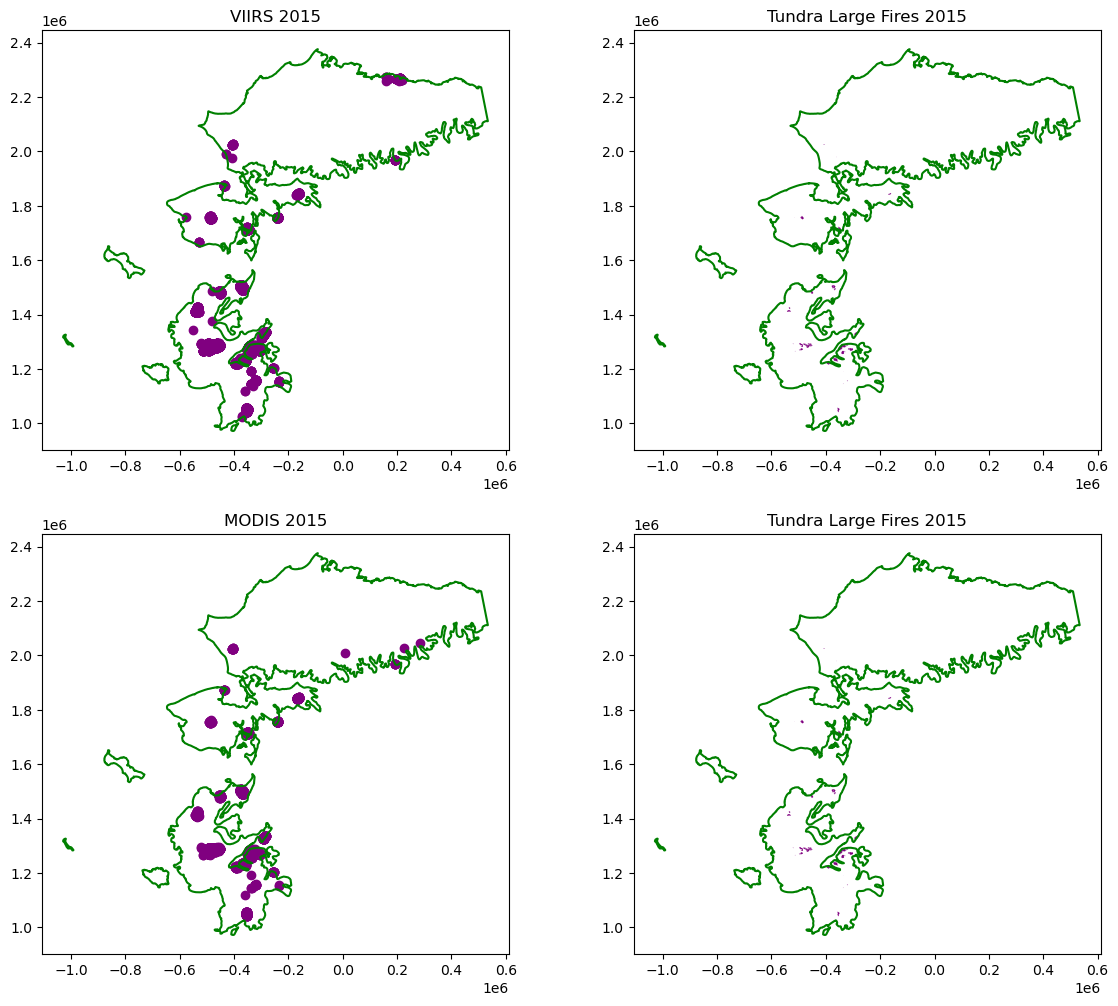

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

#fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# plot all fires across alaska
tundra_shape.boundary.plot(ax=ax[0,0], color="green")
tundra_viirs.plot(ax=ax[0,0], color="purple")
ax[0,0].set_title('VIIRS 2015')

tundra_shape.boundary.plot(ax=ax[0,1], color="green")
tundra_fires.plot(ax=ax[0,1], color="purple")
ax[0,1].set_title('Tundra Large Fires 2015')

# plot all fires across alaska
tundra_shape.boundary.plot(ax=ax[1,0], color="green")
tundra_modis.plot(ax=ax[1,0], color="purple")
ax[1,0].set_title('MODIS 2015')

tundra_shape.boundary.plot(ax=ax[1,1], color="green")
tundra_fires.plot(ax=ax[1,1], color="purple")
ax[1,1].set_title('Tundra Large Fires 2015')

#ax1.set_title("All of Alaska Large Fires", fontsize=20)
#ax2.set_title("All of Tundra Large Fires (2015 )", fontsize=20)
#ax1.set_axis_off()
#ax2.set_axis_off()
plt.show()
fig.savefig('modis_viirs_2015.png')

In [12]:
tundra_fires.sort_values(by=['GISAcres'], ascending=False).head(10)

,FireYear,LocalIncidentIdentifier,IncidentName,CauseClassification,GISAcres,FireOccurID,UniqueFireIdentifier,POOLandownerCategory,POOOwnerUnit,POOResponsibleUnit,...,FireMergedDate,MergedWithFire,IsPrescribedFire,POOCoordLong,POOCoordLat,GACC,AICC_FIREID,Shape_Length,Shape_Area,geometry
1577,2015,000229,Whitefish Lake 1,Lightning,67777.27,{288CC4F6-A4A0-473F-ADA4-BCCCB2C9802B},2015-AKSWS-000229,USFWS,AKYDR-Yukon Delta National Wildlife Refuge,AKSWS,...,NaT,None,N,-160.384167,61.381167,AICC,38036,230626.949623,2.742848e+08,"MULTIPOLYGON (((-332264.428 1289215.261, -3322..."
1423,2015,000547,North Aniak,Lightning,55703.97,{77156B17-0ECB-4EB3-BF26-DF7282A296EE},2015-AKSWS-000547,BLM,AKAND-Anchorage District Office,AKSWS,...,NaT,None,N,-159.660667,61.653833,AICC,38368,123091.372035,2.254260e+08,"POLYGON ((-299641.729 1314927.799, -299643.142..."
1452,2015,000504,Kuka Creek 4,Lightning,41628.24,{24B811DF-9A50-49DE-8EBE-C910882CCA1F},2015-AKSWS-000504,USFWS,AKYDR-Yukon Delta National Wildlife Refuge,AKSWS,...,NaT,None,N,-162.523333,61.336944,AICC,38325,282097.590929,1.684635e+08,"MULTIPOLYGON (((-463195.263 1293991.827, -4631..."
1367,2015,000615,Owhat River,Lightning,39550.41,{EFAD3284-EDDF-43D5-85A8-7995764B733F},2015-AKSWS-000615,BLM,AKAND-Anchorage District Office,AKSWS,...,NaT,None,N,-159.533333,61.800000,AICC,38442,141639.606933,1.600548e+08,"POLYGON ((-290220.939 1322775.452, -290487.951..."
1530,2015,000391,Fog River,Lightning,35579.70,{4BBC2596-1B54-413F-96B6-9E6E72227F37},2015-AKSWS-000391,USFWS,AKYDR-Yukon Delta National Wildlife Refuge,AKSWS,...,NaT,None,N,-160.758333,60.893889,AICC,38213,172681.063903,1.439859e+08,"MULTIPOLYGON (((-371124.606 1239676.700, -3711..."
1384,2015,000596,Ophir Creek,Lightning,30928.58,{A3A71744-F6CE-47BC-B776-EB3012E5CEC8},2015-AKSWS-000596,USFWS,AKYDR-Yukon Delta National Wildlife Refuge,AKSWS,...,NaT,None,N,-159.854667,61.318667,AICC,38421,97920.061469,1.251635e+08,"POLYGON ((-309840.685 1265942.700, -309823.246..."
1576,2015,000233,Bogus Creek,Lightning,25259.80,{86CD9D07-660E-4246-B725-6A39EB79F751},2015-AKSWS-000233,USFWS,AKYDR-Yukon Delta National Wildlife Refuge,AKSWS,...,NaT,None,N,-160.336500,61.205167,AICC,38040,112387.847129,1.022228e+08,"MULTIPOLYGON (((-337091.440 1265353.209, -3370..."
1433,2015,000530,Koyuk,None,23271.62,9270001D-7499-4817-A340-04C3319DB4DA,2015-AKGAD-000530,BLM,AKAND-Anchorage District Office,AKGAD,...,NaT,None,N,-161.582500,65.196833,AICC,38351,51486.348245,9.417687e+07,"POLYGON ((-354423.141 1713645.966, -354403.053..."
1371,2015,000611,Kwethluk River # 2,Lightning,23241.55,{BDD68196-DDAC-4FA8-AE4C-7831A2FC6CE9},2015-AKSWS-000611,ANCSA,"AKVLN-Kwethluk, Incorporated",AKSWS,...,NaT,None,N,-161.292778,60.784167,AICC,38438,88180.162506,9.405522e+07,"MULTIPOLYGON (((-395297.306 1218387.080, -3953..."
1406,2015,000564,Izavlknek River,Lightning,22613.30,{4E858BD7-1F26-4695-A822-4B081186826C},2015-AKSWS-000564,USFWS,AKYDR-Yukon Delta National Wildlife Refuge,AKSWS,...,NaT,None,N,-163.217548,61.306786,AICC,38388,104944.027858,9.151280e+07,"POLYGON ((-484720.217 1286605.961, -484692.010..."


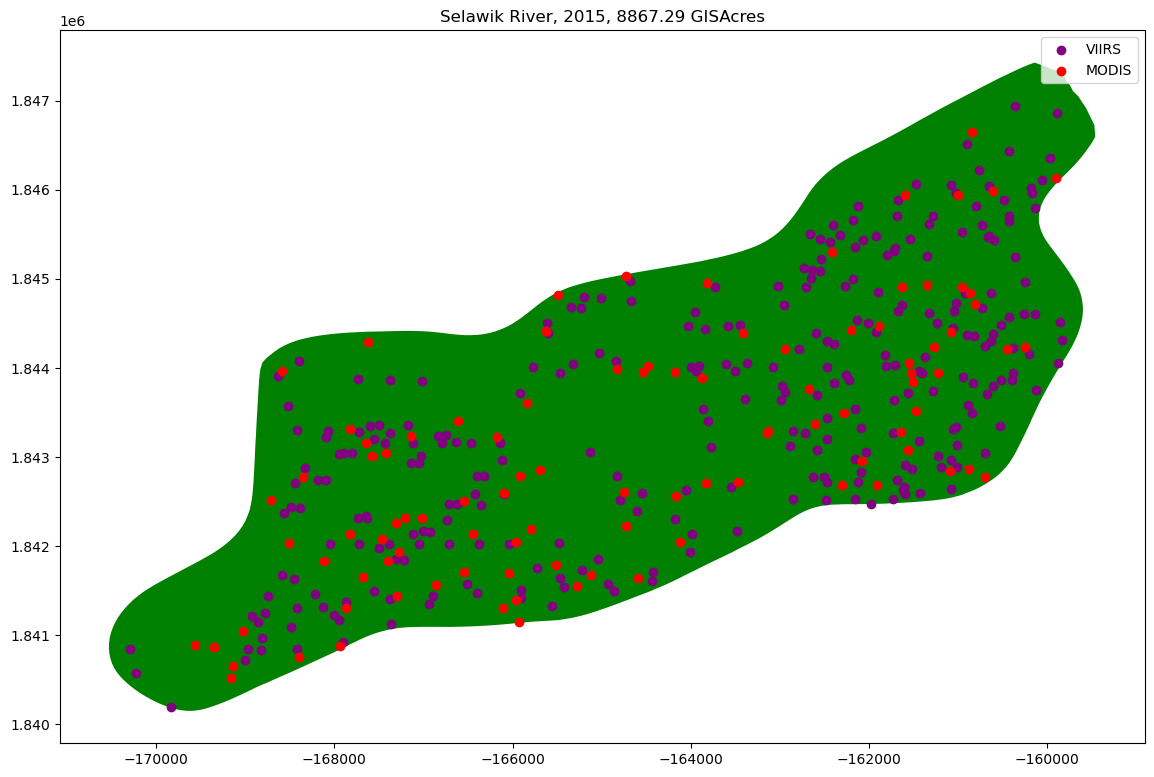

In [13]:
fire_row = tundra_fires[tundra_fires.UniqueFireIdentifier == '2015-AKGAD-000752']
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.set_title(f'{fire_row["IncidentName"].values[0]}, 2015, {fire_row["GISAcres"].values[0]} GISAcres')

# plot all fires across alaska
tundra_fires[tundra_fires.UniqueFireIdentifier == '2015-AKGAD-000752'].plot(ax=ax, color="green")
tundra_viirs.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == '2015-AKGAD-000752']).plot(ax=ax, color="purple", label='VIIRS')
tundra_modis.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == '2015-AKGAD-000752']).plot(ax=ax, color="red", label='MODIS')

plt.legend()

Index(['FireYear', 'LocalIncidentIdentifier', 'IncidentName',
       'CauseClassification', 'GISAcres', 'FireOccurID',
       'UniqueFireIdentifier', 'POOLandownerCategory', 'POOOwnerUnit',
       'POOResponsibleUnit', 'POOFireMgmtOption', 'MapMethod',
       'PerimeterDateTime', 'PerimeterLastUpdated', 'FireComments',
       'DiscoveryDate', 'ControlDate', 'OutDate', 'FireMergedDate',
       'MergedWithFire', 'IsPrescribedFire', 'POOCoordLong', 'POOCoordLat',
       'GACC', 'AICC_FIREID', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')


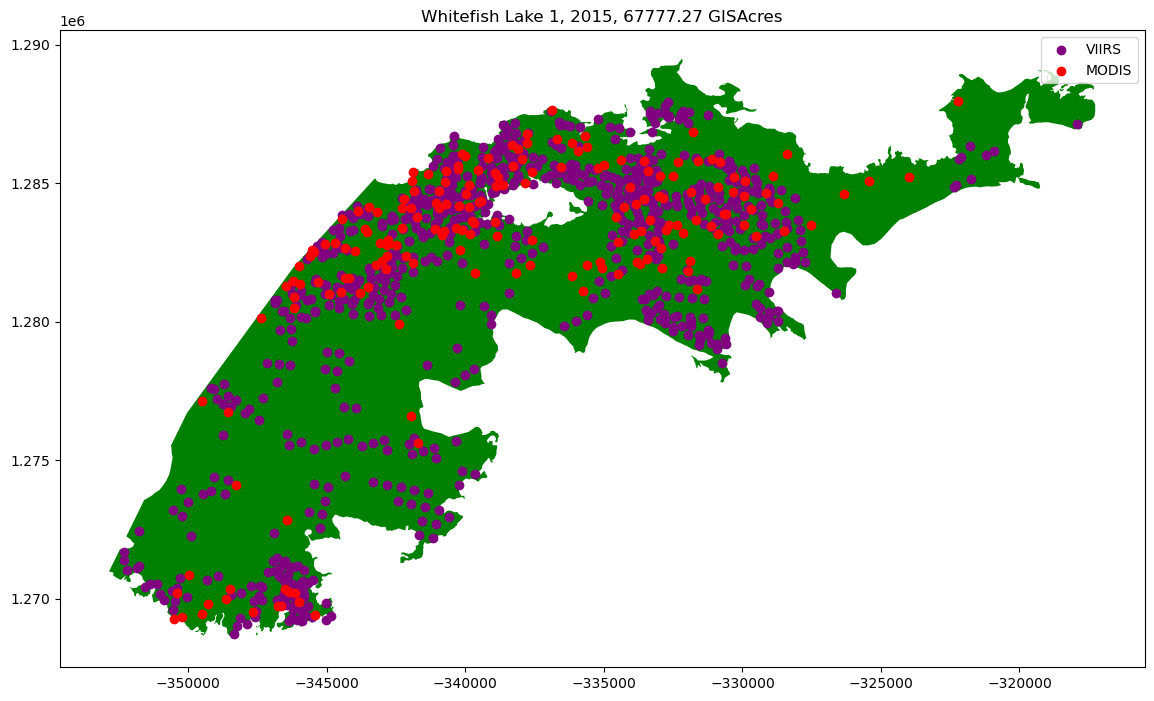

In [14]:
fire_incident = '2015-AKSWS-000229'
fire_row = tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.set_title(f'{fire_row["IncidentName"].values[0]}, 2015, {fire_row["GISAcres"].values[0]} GISAcres')

print(fire_row.columns)
fire_row['PerimeterDateTime'] = fire_row['PerimeterDateTime'].dt.strftime('%Y-%m-%d')
fire_row['PerimeterLastUpdated'] = fire_row['PerimeterLastUpdated'].dt.strftime('%Y-%m-%d')
fire_row['DiscoveryDate'] = fire_row['DiscoveryDate'].dt.strftime('%Y-%m-%d')
fire_row['ControlDate'] = fire_row['ControlDate'].dt.strftime('%Y-%m-%d')
fire_row['OutDate'] = fire_row['OutDate'].dt.strftime('%Y-%m-%d')
fire_row['FireMergedDate'] = fire_row['FireMergedDate'].dt.strftime('%Y-%m-%d')
fire_row.to_file('perimeter_2015-AKSWS-000229.shp')

# plot all fires across alaska
tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident].plot(ax=ax, color="green")
tundra_viirs.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]).plot(ax=ax, color="purple", label='VIIRS')
tundra_modis.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]).plot(ax=ax, color="red", label='MODIS')

plt.legend()

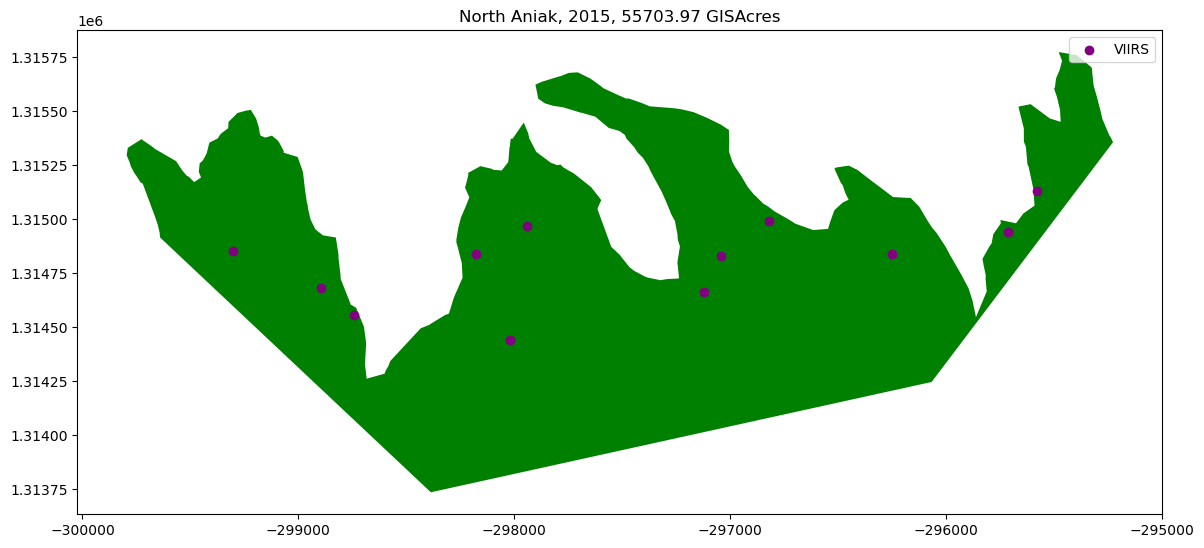

In [15]:
fire_incident = '2015-AKSWS-000547'
fire_row = tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.set_title(f'{fire_row["IncidentName"].values[0]}, 2015, {fire_row["GISAcres"].values[0]} GISAcres')

# plot all fires across alaska
tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident].plot(ax=ax, color="green")
tundra_viirs.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]).plot(ax=ax, color="purple", label='VIIRS')
tundra_modis.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]).plot(ax=ax, color="red", label='MODIS')

plt.legend()

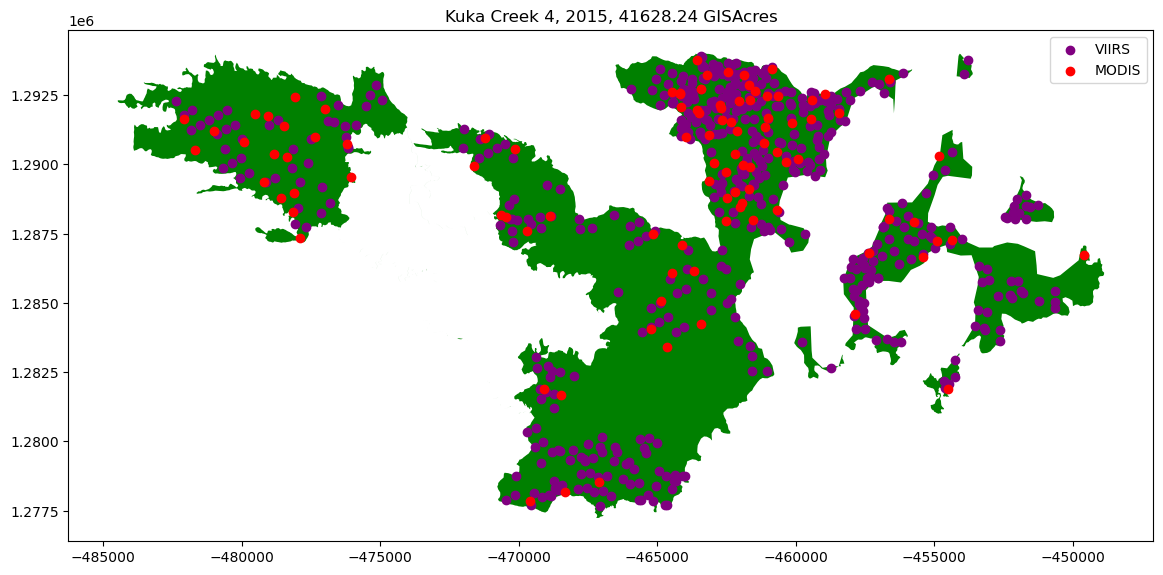

In [16]:
fire_incident = '2015-AKSWS-000504'
fire_row = tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.set_title(f'{fire_row["IncidentName"].values[0]}, 2015, {fire_row["GISAcres"].values[0]} GISAcres')

# plot all fires across alaska
tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident].plot(ax=ax, color="green")
tundra_viirs.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]).plot(ax=ax, color="purple", label='VIIRS')
tundra_modis.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]).plot(ax=ax, color="red", label='MODIS')

plt.legend()

## Reproducing DoB

In [17]:
above_dob_shapefile = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/ABoVE_DoB/DAAC/ABoVE_DoB_2015/ABoVE_DoB_2015.shp'
above_dob = gpd.read_file(above_dob_shapefile)
above_dob = above_dob.to_crs('EPSG:3338')
above_dob.head(10)

,UID_Fire,FD_Agency,REF_ID,date_src,Year,JD,Map_Date,geometry
0,1244,CA,MB-2015-EA018,1AF,2015,115,2015-04-25,"POLYGON Z ((3733916.136 1659001.317 0.000, 373..."
1,739,CA,BC-2015-K10150,1AF,2015,172,2015-06-21,"POLYGON Z ((2307496.144 780244.719 0.000, 2307..."
2,742,CA,BC-2015-N50795,1AF,2015,314,2015-11-10,"POLYGON Z ((2545412.319 621892.812 0.000, 2545..."
3,100,AK,38278,FPM,2015,186,2015-07-05,"POLYGON Z ((-202688.635 1666563.165 0.000, -20..."
4,100,AK,38278,FPM,2015,187,2015-07-06,"POLYGON Z ((-204342.483 1665063.019 0.000, -20..."
5,100,AK,38278,FPM,2015,187,2015-07-06,"POLYGON Z ((-202190.751 1666536.883 0.000, -20..."
6,100,AK,38278,FPM,2015,180,2015-06-29,"POLYGON Z ((-205899.466 1662041.808 0.000, -20..."
7,100,AK,38278,FPM,2015,180,2015-06-29,"POLYGON Z ((-205899.466 1662041.808 0.000, -20..."
8,100,AK,38278,FPM,2015,180,2015-06-29,"POLYGON Z ((-201602.552 1665929.197 0.000, -20..."
9,100,AK,38278,FPM,2015,182,2015-07-01,"POLYGON Z ((-201563.090 1665974.114 0.000, -20..."


In [18]:
above_dob.shape

(177175, 8)

In [19]:
tundra_dob = above_dob.clip(tundra_shape)
tundra_dob.shape

(2608, 8)

In [20]:
tundra_dob.head(10)

,UID_Fire,FD_Agency,REF_ID,date_src,Year,JD,Map_Date,geometry
176728,255,AK,37815,FD,2015,107,2015-04-17,"POLYGON Z ((-369639.700 1025453.055 0.000, -36..."
176805,44,AK,38524,FD,2015,180,2015-06-29,"POLYGON Z ((-349509.661 1028249.934 0.000, -34..."
93981,215,AK,38331,FPM,2015,179,2015-06-28,"POLYGON Z ((-352156.468 1042524.391 0.000, -35..."
93982,215,AK,38331,FPM,2015,178,2015-06-27,"POLYGON Z ((-352128.341 1043096.551 0.000, -35..."
93983,215,AK,38331,FPM,2015,177,2015-06-26,"POLYGON Z ((-352330.828 1043713.797 0.000, -35..."
93977,215,AK,38331,FPM,2015,177,2015-06-26,"POLYGON Z ((-354327.143 1044491.607 0.000, -35..."
93969,215,AK,38331,FPM,2015,175,2015-06-24,"POLYGON Z ((-354886.883 1044766.283 0.000, -35..."
93972,215,AK,38331,FPM,2015,177,2015-06-26,"POLYGON Z ((-354372.337 1045583.029 0.000, -35..."
93971,215,AK,38331,FPM,2015,178,2015-06-27,"POLYGON Z ((-354345.888 1045521.814 0.000, -35..."
93970,215,AK,38331,FPM,2015,179,2015-06-28,"POLYGON Z ((-354250.241 1045402.523 0.000, -35..."


## Calculate DoB for Specific Fire

In [21]:
def open_raster(file_name, band_number=1):
    """
    Open a raster file and access its bands
    :param file_name: STR of a raster file directory and name
    :param band_number: INT of the raster band number to open (default: 1)
    :output: osgeo.gdal.Dataset, osgeo.gdal.Band objects
    """
    gdal.UseExceptions()
    # open raster file or return None if not accessible
    try:
        raster = gdal.Open(file_name)
    except RuntimeError as e:
        print("ERROR: Cannot open raster.")
        print(e)
        return None
    # open raster band or return None if corrupted
    try:
        raster_band = raster.GetRasterBand(band_number)
    except RuntimeError as e:
        print("ERROR: Cannot access raster band.")
        print(e)
        return None
    return raster, raster_band

def get_srs(dataset):
    """
    Get the spatial reference of any gdal.Dataset
    :param dataset: osgeo.gdal.Dataset (raster)
    :output: osr.SpatialReference
    """
    sr = osr.SpatialReference()
    sr.ImportFromWkt(dataset.GetProjection())
    # auto-detect epsg
    auto_detect = sr.AutoIdentifyEPSG()
    if auto_detect != 0:
        sr = sr.FindMatches()[0][0]  # Find matches returns list of tuple of SpatialReferences
        sr.AutoIdentifyEPSG()
    # assign input SpatialReference
    sr.ImportFromEPSG(int(sr.GetAuthorityCode(None)))
    return sr

def create_raster(file_name, raster_array, origin=None, epsg=4326, pixel_width=10, pixel_height=10,
                  nan_value=-9999.0, rdtype=gdal.GDT_Float32, geo_info=False):
    """
    Convert a numpy.array to a GeoTIFF raster with the following parameters
    :param file_name: STR of target file name, including directory; must end on ".tif"
    :param raster_array: np.array of values to rasterize
    :param origin: TUPLE of (x, y) origin coordinates
    :param epsg: INT of EPSG:XXXX projection to use - default=4326
    :param pixel_height: INT of pixel height (multiple of unit defined with the EPSG number) - default=10m
    :param pixel_width: INT of pixel width (multiple of unit defined with the EPSG number) - default=10m
    :param nan_value: INT/FLOAT no-data value to be used in the raster (replaces non-numeric and np.nan in array)
                        default=-9999.0
    :param rdtype: gdal.GDALDataType raster data type - default=gdal.GDT_Float32 (32 bit floating point)
    :param geo_info: TUPLE defining a gdal.DataSet.GetGeoTransform object (supersedes origin, pixel_width, pixel_height)
                        default=False
    """
    # check out driver
    driver = gdal.GetDriverByName('GTiff')

    # create raster dataset with number of cols and rows of the input array
    cols = raster_array.shape[1]
    rows = raster_array.shape[0]
    new_raster = driver.Create(file_name, cols, rows, 1, eType=rdtype)    

    # apply geo-origin and pixel dimensions
    if not geo_info:
        origin_x = origin[0]
        origin_y = origin[1]
        new_raster.SetGeoTransform((origin_x, pixel_width, 0, origin_y, 0, pixel_height))
    else:
        new_raster.SetGeoTransform(geo_info)
    
    # replace np.nan values
    raster_array[np.isnan(raster_array)] = nan_value

    # retrieve band number 1
    band = new_raster.GetRasterBand(1)
    band.SetNoDataValue(nan_value)
    band.WriteArray(raster_array)
    band.SetScale(1.0)

    # create projection and assign to raster
    srs = osr.SpatialReference()
    srs.ImportFromEPSG(epsg)
    new_raster.SetProjection(srs.ExportToWkt())

    # release raster band
    band.FlushCache()

def get_wkt(epsg, wkt_format="esriwkt"):
    """Gets WKT-formatted projection information for an epsg code using the ``osr`` library.
    Args:
        epsg (int): epsg Authority code
        wkt_format (str): of wkt format (default is esriwkt for shapefile projections)
      
    Returns:
        str: WKT (if error: returns default corresponding to ``epsg=4326``).
    """
    default = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295],UNIT["Meter",1]]'
    spatial_ref = osr.SpatialReference()
    try:
        spatial_ref.ImportFromEPSG(epsg)
    except TypeError:
        logging.error("epsg must be integer. Returning default WKT(epsg=4326).")
        return default
    except Exception:
        logging.error("epsg number does not exist. Returning default WKT(epsg=4326).")
        return default
    if wkt_format == "esriwkt":
        spatial_ref.MorphToESRI()
    return spatial_ref.ExportToPrettyWkt()

def make_prj(shp_file_name, epsg):
    """Generates a projection file for a shapefile.
    Args:
        shp_file_name (str): of a shapefile name (with directory e.g., ``"C:/temp/poly.shp"``).
        epsg (int): EPSG Authority Code
    Returns:
        Creates a projection file (``.prj``) in the same directory and with the same name of ``shp_file_name``.
    """
    shp_dir = shp_file_name.strip(shp_file_name.split("/")[-1].split("\\")[-1])
    shp_name = shp_file_name.split(".shp")[0].split("/")[-1].split("\\")[-1]
    with open(r"" + shp_dir + shp_name + ".prj", "w+") as prj:
        prj.write(get_wkt(epsg))

def create_shp(shp_file_dir, overwrite=True, *args, **kwargs):
    """
    :param shp_file_dir: STR of the (relative shapefile directory (ends on ".shp")
    :param overwrite: [optional] BOOL - if True, existing files are overwritten
    :kwarg layer_name: [optional] STR of the layer_name - if None: no layer will be created (max. 13 chars)
    :kwarg layer_type: [optional] STR ("point, "line", or "polygon") of the layer_name - if None: no layer will be created
    :output: returns an ogr shapefile layer
    """
    shp_driver = ogr.GetDriverByName("ESRI Shapefile")

    # check if output file exists if yes delete it
    if os.path.exists(shp_file_dir) and overwrite:
        shp_driver.DeleteDataSource(shp_file_dir)

    # create and return new shapefile object
    new_shp = shp_driver.CreateDataSource(shp_file_dir)

    # create layer if layer_name and layer_type are provided
    if kwargs.get("layer_name") and kwargs.get("layer_type"):
        # create dictionary of ogr.SHP-TYPES
        geometry_dict = {"point": ogr.wkbPoint,
                         "line": ogr.wkbMultiLineString,
                         "polygon": ogr.wkbMultiPolygon}
        # create layer
        try:
            new_shp.CreateLayer(str(kwargs.get("layer_name")),
                                geom_type=geometry_dict[str(kwargs.get("layer_type").lower())])
        except KeyError:
            print("Error: Invalid layer_type provided (must be 'point', 'line', or 'polygon').")
        except TypeError:
            print("Error: layer_name and layer_type must be string.")
        except AttributeError:
            print("Error: Cannot access layer - opened in other program?")
    return new_shp


def raster2array(file_name, band_number=1):
    """
    :param file_name: STR of target file name, including directory; must end on ".tif"
    :param band_number: INT of the raster band number to open (default: 1)
    :output: (1) ndarray() of the indicated raster band, where no-data values are replaced with np.nan
             (2) the GeoTransformation used in the original raster
    """
    # open the raster and band (see above)
    raster, band = open_raster(file_name, band_number=band_number)
    # read array data from band
    band_array = band.ReadAsArray()
    # overwrite NoDataValues with np.nan
    band_array = np.where(band_array == band.GetNoDataValue(), np.nan, band_array)
    # return the array and GeoTransformation used in the original raster
    return raster, band_array, raster.GetGeoTransform()

def float2int(raster_file_name, band_number=1):
    
    #:param raster_file_name: STR of target file name, including directory; must end on ".tif"
    #:param band_number: INT of the raster band number to open (default: 1)
    #:output: new_raster_file_name (STR)
    
    # use raster2array function to get raster, np.array and the geo transformation
    raster, array, geo_transform = raster2array(raster_file_name, band_number=band_number)
    
    # convert np.array to integers
    try:
        array = array.astype(int)
    except ValueError:
        print("ERROR: Invalid raster pixel values.")
        return raster_file_name
    
    # get spatial reference system
    src_srs = get_srs(raster)
    
    # create integer raster    
    new_name = raster_file_name.split(".tif")[0] + "_int.tif"
    create_raster(new_name, array, epsg=int(src_srs.GetAuthorityCode(None)),
                  rdtype=gdal.GDT_Int32, geo_info=geo_transform)
    # return name of integer raster
    return new_name


def raster2polygon(file_name, out_shp_fn, band_number=1, field_name="JD"):
    """
    Convert a raster to polygon
    :param file_name: STR of target file name, including directory; must end on ".tif"
    :param out_shp_fn: STR of a shapefile name (with directory e.g., "C:/temp/poly.shp")
    :param band_number: INT of the raster band number to open (default: 1)
    :param field_name: STR of the field where raster pixel values will be stored (default: "values")
    :return: None
    """
    # ensure that the input raster contains integer values only and open the input raster
    file_name = float2int(file_name)
    raster, raster_band = open_raster(file_name, band_number=band_number)

    # create new shapefile with the create_shp function
    new_shp = create_shp(out_shp_fn, layer_name="raster_data", layer_type="polygon")
    dst_layer = new_shp.GetLayer()

    # create new field to define values
    new_field = ogr.FieldDefn(field_name, ogr.OFTInteger)
    dst_layer.CreateField(new_field)

    # Polygonize(band, hMaskBand[optional]=None, destination lyr, field ID, papszOptions=[], callback=None)
    gdal.Polygonize(raster_band, None, dst_layer, 0, [], callback=None)

    # create projection file
    srs = get_srs(raster)
    make_prj(out_shp_fn, int(srs.GetAuthorityCode(None)))
    print("Success: Wrote %s" % str(out_shp_fn))

def compute_fire_perimeter(tundra_fires, fire_incident):
    fire_row = tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]
    #print(fire_row.total_bounds)
    bbox = fire_row.total_bounds
    xmin, ymin, xmax, ymax = bbox
    res = 30 # desired resolution
    w = (xmax - xmin) // res 
    h = (ymax - ymin) // res
    return [round(xmin), round(ymax), res, w, h, fire_row]
    # fire_row.to_file('perimeter_2015-AKSWS-000229.shp')

    # plot all fires across alaska
    #tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident].plot(ax=ax, color="green")
    #tundra_viirs.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]).plot(ax=ax, color="purple", label='VIIRS')
    #tundra_modis.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]).plot(ax=ax, color="red", label='MODIS')


def fire_incident_to_shp(af_geometry, tundra_fires, fire_incident, output_filename):
    af_geometry_clip = af_geometry.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident])
    acq_date = pd.to_datetime(af_geometry_clip['acq_date'])
    af_geometry_clip['JD'] = acq_date.dt.dayofyear.astype(str)
    af_geometry_clip.to_file(output_filename)

    #af_geometry_clip['acq_date'] = af_geometry_clip['acq_date'].dt.strftime('%Y-%m-%d')
    #print(af_geometry_clip)
    # modis_clip.head(2).to_file('modis_2015-AKSWS-000229.shp')
    return af_geometry_clip
    
def compute_idw(shape_filename, xmin, ymax, res, w, h, fire_geom):
    
    pts = ogr.Open(shape_filename, 0)
    layer = pts.GetLayer()
    
    output_raster = 'invdist.tif'
    output_shapefile = f'{Path(shape_filename).with_suffix("")}_idw.shp'

    #for field in layer.schema:
    #    print(field.name)

    #dem = gdal.Open("perimeter_2015-AKSWS-000229_blank_croped.tif")
    #gt = dem.GetGeoTransform()
    
    #print(gt[0], gt[3], gt[1], dem.RasterXSize, dem.RasterYSize)
    #print(xmin, ymax, res, w, h)

    ulx = xmin
    uly = ymax
    res = res

    xsize = w
    ysize = h

    lrx = ulx + xsize * res
    lry = uly - ysize * res

    #dem = None
    pts = layer = None


    # inverse distance to a power
    idw = gdal.Grid(output_raster, shape_filename, zfield = "JD",
                    #algorithm = "invdist:power=2:radius1=2000:radius2=2000",
                    algorithm = "invdist:power=2:radius1=9000:radius2=9000", #really good
                    #algorithm = "invdist:power=2:radius1=9000:radius2=9000:smoothing=10.0", # smoothing=0.5 not good
                    outputBounds = [ulx,uly,lrx,lry],
                    width = xsize, height = ysize)
    idw = None
    
    raster2polygon(output_raster, output_shapefile)

    # clip shape
    gdf_new = gpd.read_file(output_shapefile)
    #gdf_boundary = gpd.read_file("perimeter_2015-AKSWS-000229.shp")
    #gdf_new.clip(gdf_boundary)
    gdf_new = gpd.clip(gdf_new, fire_geom)
    
    print(Path(output_shapefile).with_suffix('.gpkg'))
    gdf_new.to_file(Path(output_shapefile).with_suffix('.gpkg'), driver='GPKG', layer='fire')

    return gdf_new

In [41]:
# get fire perimeter into raster
# 
# make active fire into shapefile
# modis_fire_incident_to_shp(tundra_modis, tundra_fires, fire_incident)
# calculate idw
# 
# -352870.0 1289479.0 35.607 1000 587
#fire_incident = '2015-AKSWS-000229'
#fire_incident = '2015-AKGAD-000752'
#fire_incident = '2015-AKSWS-000547'
fire_incident = '2015-AKSWS-000504'

# GET FIRE PERIMETER
xmin, ymax, res, w, h, fire_geom = compute_fire_perimeter(tundra_fires, fire_incident)

# GET MODIS ACTIVE FIRE
#tundra_viirs
#tundra_modis
fire_viirs = fire_incident_to_shp(tundra_viirs, tundra_fires, fire_incident, f'{fire_incident}_viirs.shp')
fire_modis = fire_incident_to_shp(tundra_modis, tundra_fires, fire_incident, f'{fire_incident}_modis.shp')

# COMPUTE IDW
fire_idw_viirs = compute_idw(f'{fire_incident}_viirs.shp', xmin, ymax, res, w, h, fire_geom)
fire_idw_modis = compute_idw(f'{fire_incident}_modis.shp', xmin, ymax, res, w, h, fire_geom)

Success: Wrote 2015-AKSWS-000504_viirs_idw.shp
2015-AKSWS-000504_viirs_idw.gpkg
Success: Wrote 2015-AKSWS-000504_modis_idw.shp
2015-AKSWS-000504_modis_idw.gpkg


38325
172 186


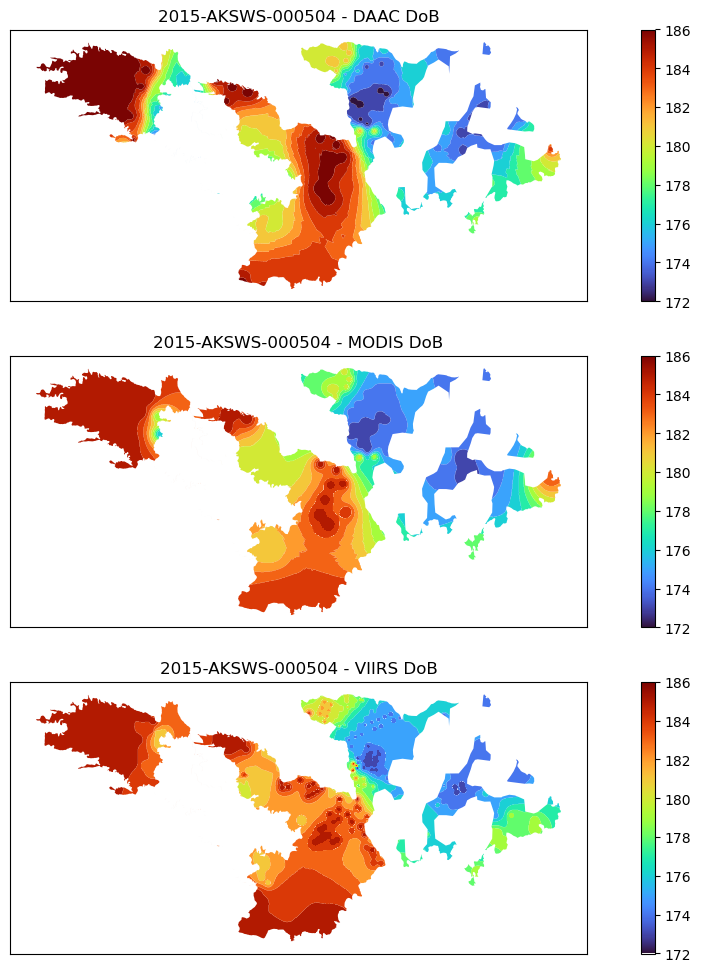

In [42]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12))

print(fire_geom.AICC_FIREID.item())

# dob product
dob_scar = tundra_dob[tundra_dob.REF_ID == str(fire_geom.AICC_FIREID.item())]#'38036']


vmin = np.array([dob_scar['JD'].min(), fire_idw_modis['JD'].min(), fire_idw_viirs['JD'].min()]).min()
vmax = np.array([dob_scar['JD'].max(), fire_idw_modis['JD'].max(), fire_idw_viirs['JD'].max()]).max()

print(vmin, vmax)

# plot
dob_scar.plot(ax=ax[0], column='JD', cmap = "turbo", legend=True, label='DAAC DoB', vmin=vmin, vmax=vmax)
fire_idw_modis.plot(ax=ax[1], column='JD', cmap = "turbo", legend=True, label='MODIS', vmin=vmin, vmax=vmax)
fire_idw_viirs.plot(ax=ax[2], column='JD', cmap = "turbo", legend=True, label='VIIRS', vmin=vmin, vmax=vmax)

for axi, title in zip(ax, ['DAAC DoB', 'MODIS DoB', 'VIIRS DoB']):
    axi.set_yticks([])
    axi.set_xticks([])
    axi.set_title(f'{fire_incident} - {title}')


# modis active fire
#modis_clip = tundra_modis.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident])
#modis_clip['JD'] = pd.to_datetime(modis_clip['acq_date']).dt.dayofyear.astype(str)
#modis_clip.plot(ax=ax[1], column='JD', cmap = "viridis", legend=False, label='MODIS') # legend_kwds={'bbox_to_anchor': (1.3, 1)}

#gdal_dob_filename = 'modis_2015-AKSWS-000229_idw_2000rad_gdal.shp'
#gdal_dob = gpd.read_file(gdal_dob_filename)
#gdal_dob.sort_values(by=['JD'], ascending=True).plot(ax=ax[2], column='JD', cmap = "viridis", legend=True)


#ax[0].set(xlim=(-360000, -310000), ylim=(1268000, 1290000))
#ax[1].set(xlim=(-360000, -310000), ylim=(1268000, 1290000))
#ax[2].set(xlim=(-360000, -310000), ylim=(1268000, 1290000))


#for axi in ax:
#    axi.set_anchor('W')

# plot all fires across alaska
#tundra_shape.boundary.plot(ax=ax[0,0], color="green")
#tundra_viirs.plot(ax=ax[0,0], color="purple")
#ax[0,0].set_title('VIIRS 2015')

#tundra_shape.boundary.plot(ax=ax[0,1], color="green")
#tundra_fires.plot(ax=ax[0,1], color="purple")
#ax[0,1].set_title('Tundra Large Fires 2015')

# plot all fires across alaska
#tundra_shape.boundary.plot(ax=ax[1,0], color="green")
#tundra_modis.plot(ax=ax[1,0], color="purple")
#ax[1,0].set_title('MODIS 2015')

#tundra_shape.boundary.plot(ax=ax[1,1], color="green")
#tundra_dob.plot(ax=ax[1,1], color="purple")
#ax[1,1].set_title('Tundra Large Fires 2015')

#ax1.set_title("All of Alaska Large Fires", fontsize=20)
#ax2.set_title("All of Tundra Large Fires (2015 )", fontsize=20)
#ax1.set_axis_off()
#ax2.set_axis_off()
#plt.show()
fig.savefig(f'{fire_incident}_comparison.png')

In [ ]:
tundra_dob.head()

In [ ]:
tundra_fires.head()

In [ ]:
fire_geom.head()

## DoB comparison visualization

In [ ]:
#fig, ax = plt.subplots(3, 1, figsize=(14, 12))

# dob product
#dob_scar = tundra_dob[tundra_dob.REF_ID == '38036']
#dob_scar.plot(ax=ax[0], column='JD', cmap = "viridis", legend=True)

# modis active fire
#fire_incident = '2015-AKSWS-000229'
#modis_clip = tundra_modis.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident])
#modis_clip['JD'] = pd.to_datetime(modis_clip['acq_date']).dt.dayofyear.astype(str)
#modis_clip.plot(ax=ax[1], column='JD', cmap = "viridis", legend=False, label='MODIS') # legend_kwds={'bbox_to_anchor': (1.3, 1)}

#gdal_dob_filename = 'modis_2015-AKSWS-000229_idw_2000rad_gdal.shp'
#gdal_dob = gpd.read_file(gdal_dob_filename)
#gdal_dob.sort_values(by=['JD'], ascending=True).plot(ax=ax[2], column='JD', cmap = "viridis", legend=True)


#ax[0].set(xlim=(-360000, -310000), ylim=(1268000, 1290000))
#ax[1].set(xlim=(-360000, -310000), ylim=(1268000, 1290000))
#ax[2].set(xlim=(-360000, -310000), ylim=(1268000, 1290000))


#for axi in ax:
#    axi.set_anchor('W')

# plot all fires across alaska
#tundra_shape.boundary.plot(ax=ax[0,0], color="green")
#tundra_viirs.plot(ax=ax[0,0], color="purple")
#ax[0,0].set_title('VIIRS 2015')

#tundra_shape.boundary.plot(ax=ax[0,1], color="green")
#tundra_fires.plot(ax=ax[0,1], color="purple")
#ax[0,1].set_title('Tundra Large Fires 2015')

# plot all fires across alaska
#tundra_shape.boundary.plot(ax=ax[1,0], color="green")
#tundra_modis.plot(ax=ax[1,0], color="purple")
#ax[1,0].set_title('MODIS 2015')

#tundra_shape.boundary.plot(ax=ax[1,1], color="green")
#tundra_dob.plot(ax=ax[1,1], color="purple")
#ax[1,1].set_title('Tundra Large Fires 2015')

#ax1.set_title("All of Alaska Large Fires", fontsize=20)
#ax2.set_title("All of Tundra Large Fires (2015 )", fontsize=20)
#ax1.set_axis_off()
#ax2.set_axis_off()
#plt.show()
#fig.savefig('modis_viirs_2015.png')

In [ ]:
#fire_incident = '2015-AKSWS-000229'
#fire_row = tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident]
#fig, ax = plt.subplots(1, 1, figsize=(14, 12))
#ax.set_title(f'{fire_row["IncidentName"].values[0]}, 2015, {fire_row["GISAcres"].values[0]} GISAcres')

#modis_clip = tundra_modis.clip(tundra_fires[tundra_fires.UniqueFireIdentifier == fire_incident])
#modis_clip['acq_date']= pd.to_datetime(modis_clip['acq_date'])
#modis_clip['JD'] = modis_clip['acq_date'].dt.dayofyear.astype(str)
#df['ConvertedDate']=df['DateTypeCol'].astype(str)
#modis_clip['JD']
#modis_clip.plot(ax=ax, column='JD', cmap = "viridis", legend=True, label='MODIS')
#plt.legend()
# acq_date

In [ ]:
#dob_scar.sort_values(by=['JD'], ascending=True)

In [ ]:
#modis_clip['acq_date'] = modis_clip['acq_date'].dt.strftime('%Y-%m-%d')
#modis_clip.head(2).to_file('modis_2015-AKSWS-000229.shp')  
#modis_clip['JD']
#modis_clip

In [ ]:
#modis_clip.sort_values(by=['JD'], ascending=True).to_file('modis_2015-AKSWS-000229.shp')  

In [ ]:
#from idw import idw_interpolation
#
#idw_interpolation(
#    input_point_shapefile="modis_2015-AKSWS-000229.shp",
#    extent_shapefile="perimeter_2015-AKSWS-000229.shp",
#    column_name="JD",
#    power=2,
#    search_radious=200,
#    output_resolution=250,
#)

In [ ]:
#modis_clip.shape

In [ ]:
#dob_scar.shape

In [ ]:
#dob_scar.sort_values(by=['JD'], ascending=True).head(10)

In [ ]:
#src_raster = "modis_2015-AKSWS-000229_idw.tif"
#src_raster = 'invdist.tif'
#tar_shp = "modis_2015-AKSWS-000229_idw_2000rad_gdal_smooth.shp"
#raster2polygon(src_raster, tar_shp)

# clip shape
#gdf_new = gpd.read_file(tar_shp)
#gdf_boundary = gpd.read_file("perimeter_2015-AKSWS-000229.shp")
#gdf_new.clip(gdf_boundary)
#gdf_new = gpd.clip(gdf_new, gdf_boundary)
#gdf_new.to_file(tar_shp)

In [ ]:
#gdf_boundary.plot()

In [ ]:
#gdf_new.plot()